<a href="https://colab.research.google.com/github/SamuelRaj0911/ML-Lab/blob/main/CIA_2_ML_2348550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing datasets for the analyisis:

numpy is used for mathematil calculations and for finding covariance among two variables.
pandas is used for transforming the dataset to an array for analysis
matplotlib is used for visualization
seaborn is used for statistical visualization.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, classification_report

**Data Loading and Inspection**

In [14]:
df=pd.read_csv('/content/2015.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.shape

(158, 12)

<Axes: >

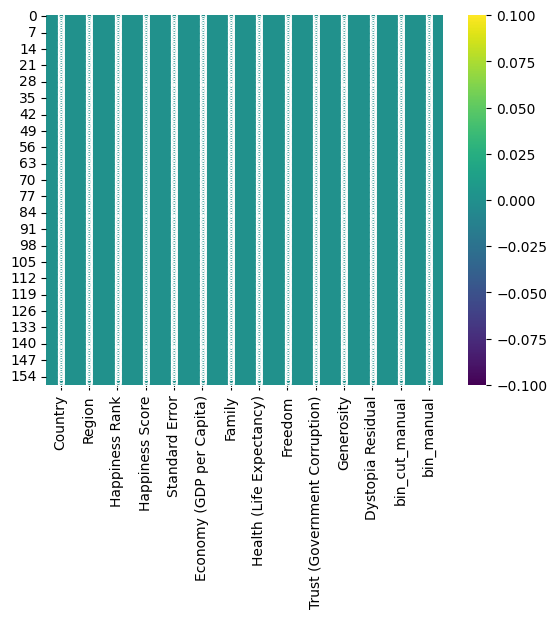

In [118]:
sns.heatmap(df.isnull(),annot=True,cmap='viridis')

**Missing Values**

Identify and count the missing values in the dataset. Which columns have missing values?

In [10]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**Binning**

Create bins for the 'Happiness Score' column to categorize countries into Low Happiness,Medium Happiness and High Happiness groups.

In [112]:
label1=['low','medium','high']
bin1=[2,4,7,8]
df['bin_manual']=pd.cut(df['Happiness Score'],bins=bin1,labels=label1,include_lowest=True)

<Axes: >

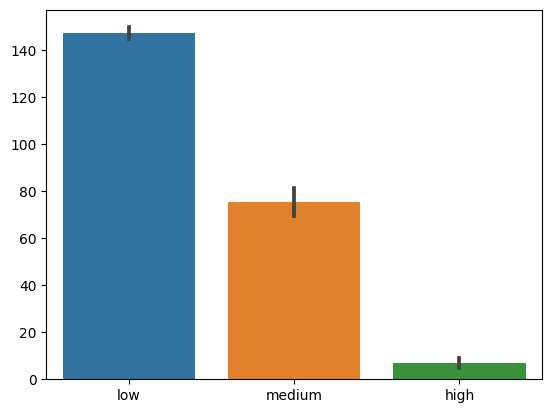

In [113]:
sns.barplot(x=df['bin_manual'].values,y=df['bin_manual'].index)

**One-Hot encoding**

Perform one-hot encoding on the Region column to convert it into numerical values.

In [106]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Region', 'Country'])
print(one_hot_encoded_data)

     Happiness Rank  Happiness Score  Standard Error  \
0                 1            7.587         0.03411   
1                 2            7.561         0.04884   
2                 3            7.527         0.03328   
3                 4            7.522         0.03880   
4                 5            7.427         0.03553   
..              ...              ...             ...   
153             154            3.465         0.03464   
154             155            3.340         0.03656   
155             156            3.006         0.05015   
156             157            2.905         0.08658   
157             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                  

**Covariance matrix**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


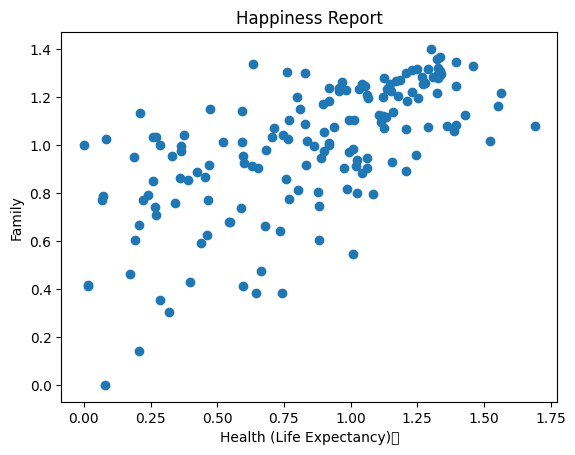

In [94]:
plt.scatter(df['Economy (GDP per Capita)'], df['Family'])
plt.xlabel('Health (Life Expectancy)	')
plt.ylabel('Family')
plt.title('Happiness Report')
plt.show()

<Axes: >

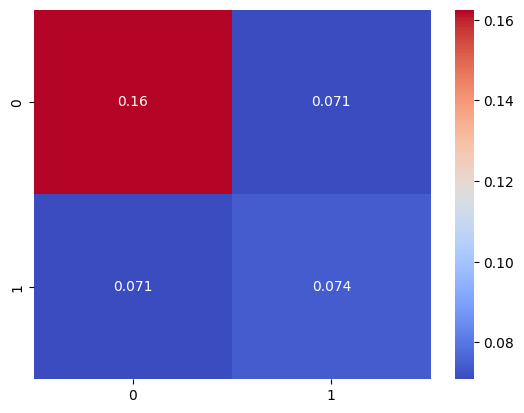

In [115]:
cov1=np.cov(df['Economy (GDP per Capita)'],df['Family'])
sns.heatmap(cov1,annot=True,cmap='coolwarm')

<Axes: >

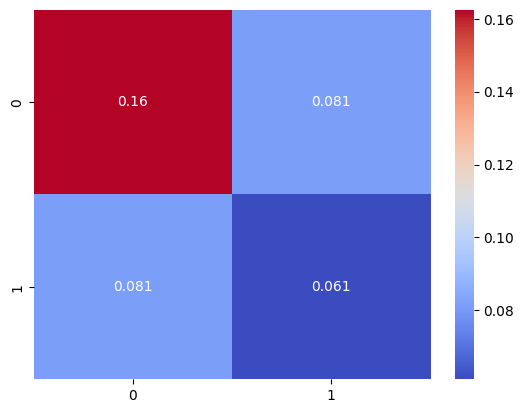

In [116]:
cov2=np.cov(df['Economy (GDP per Capita)'],df['Health (Life Expectancy)'])
cov2

sns.heatmap(cov2,annot=True,cmap='coolwarm')

<Axes: >

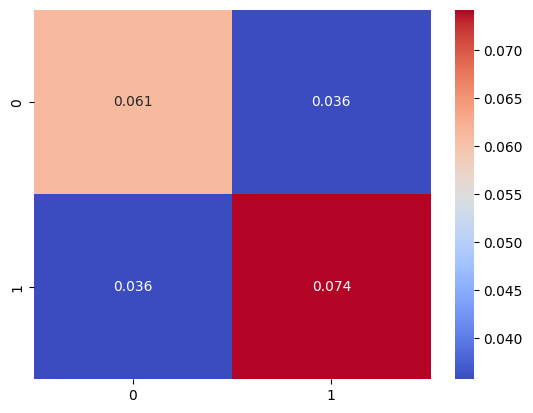

In [117]:
cov3=np.cov(df['Health (Life Expectancy)'],df['Family'])
cov3

sns.heatmap(cov3,annot=True,cmap='coolwarm')

**Chi-Square Test**

You want to test if there is a significant association between the Region and Happiness Rank columns. Perform a chi-square test and interpret the results.

In [114]:
from scipy.stats import chi2_contingency
contingency=pd.crosstab(df['Region'],df['Happiness Rank'])
chi2,p,dof,expected=chi2_contingency(contingency)
print('chi square test value: ',chi2)
print('P value: ',p)
print('Degree of freedom: ',dof)
print('expected value: ',expected)

chi square test value:  1415.3258620689655
P value:  0.4107040079831256
Degree of freedom:  1404
expected value:  [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]
